# Database of Baby Names
## 3/19/2023

### Introduction

For this project I chose to go with the US baby names date because I believe I can be more creative with how I manipulate the Dataframe. The database is made by the government and updated evry year since 1910. The Baby Names dataframe is organized by the state, sex, year, name and the number of babies with that name that year. Because of all of this organization, there are many fun ways to manipulate the data. For example, seeing what the most popular name of all time in Alaska. 

In this project I will be apllying different methods to the dataframe. The method groupby is one that you will see a lot in the code below. It's very useful to apply different tricks to different columns of the database. 

The data is retrieved from the site https://www.ssa.gov/oact/babynames/limits.html

### Import Python libraries

In [1]:
%pylab inline
import seaborn as sns
import glob
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Firstly, make the method load_namesbystate_data_info_df(...) to bring in the dataframe so that it can be used and handled.

In [2]:
def load_namesbystate_data_into_df(folder_name):
    folder_name = 'namesbystate'
    file_names = glob.glob(folder_name+"/*.txt")
    states = [f[-6:-4] for f in file_names]
    list_of_frames = [pd.read_csv(f, names=["state","sex","year","name","count"]) for f in file_names]
    df = pd.concat(list_of_frames)
    return df

In [3]:
folder_name_state = 'namesbystate'
df = load_namesbystate_data_into_df(folder_name_state)

In [4]:
df

,state,sex,year,name,count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7
...,...,...,...,...,...
28746,WY,M,2021,Santiago,5
28747,WY,M,2021,Spencer,5
28748,WY,M,2021,Tate,5
28749,WY,M,2021,Timothy,5


In [34]:
def load_names_data_into_df(folder_name):
    file_names = glob.glob(folder_name+"/yob*.txt")
    years = [int(f[-8:-4]) for f in file_names]
    list_of_frames = [pd.read_csv(f, names=["name","sex","count"]) for f in file_names]
    df = pd.concat(list_of_frames,keys=years)
    df=df.reset_index(level=0)
    df=df.rename({'level_0':'year'},axis=1)
    df=df.sort_values(by=['year','name'])
    return df

In [35]:
folder_name_national = 'names'
df_national = load_names_data_into_df(folder_name_national)

In [36]:
df_national

,year,name,sex,count
1072,1880,Aaron,M,102
1850,1880,Ab,M,5
177,1880,Abbie,F,71
1851,1880,Abbott,M,5
737,1880,Abby,F,6
...,...,...,...,...
12115,2021,Zyriah,F,8
29595,2021,Zyrie,M,6
17543,2021,Zyrihanna,F,5
23843,2021,Zyron,M,14


### Number of unique names over time

The first thing I was curious about was how many unique names there were per year. By combining groupby and nunique, I am able to make it so the dataframe only counts each name once so you can get how many different names there were. 

In [5]:
df_num_of_names = df.groupby(['year']).nunique()

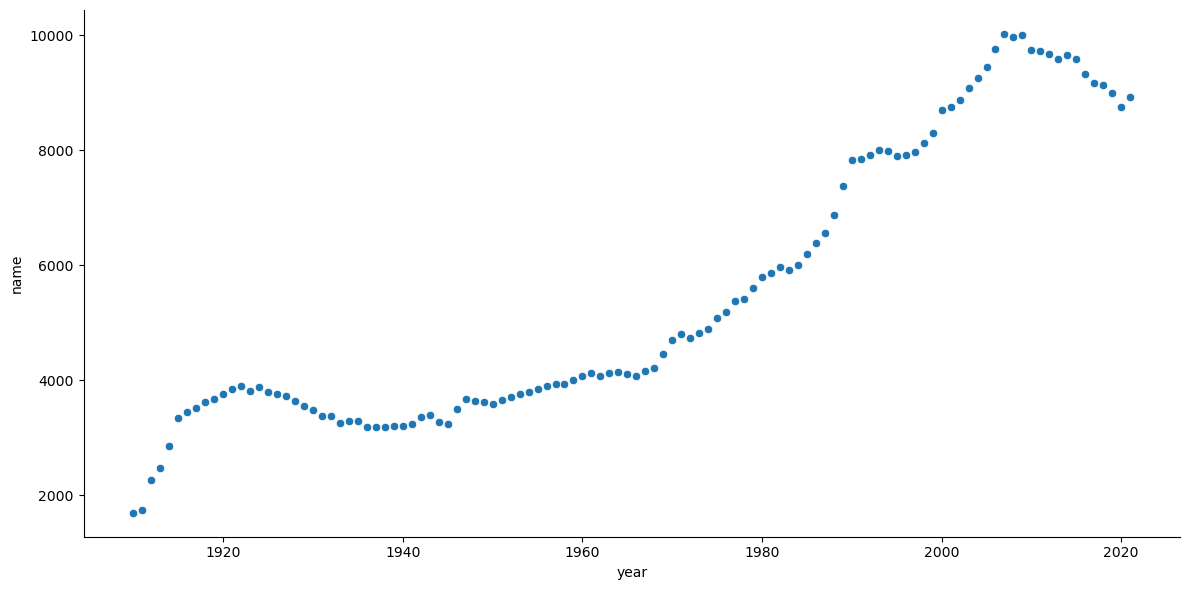

In [6]:
sns.relplot(data=df_num_of_names,
            x="year",
            y="name",
            height=6,aspect=2
);

Above is the plot of unique names over time from 1910 to 2021. The higher the dots the more unique names there were that year. What you can imply from this graph and for many of the other in this project is that the graphs tent to act in similar ways after 1950. This is likely because this was the babyboomer generation where Americans were having more babies and getting more creative with the names. 

### Number of babies per name on average

After findout out how many unique names per year there were, I was curious to find out how many babies shared the same name on average. By diving the sum of the total number of babies by the number of unique names, you get the number of babies per name per year.

In [7]:
df1 = df.groupby(['year']).sum()['count']/df.groupby(['year']).nunique()['name']

In [8]:
df1['babypername'] = df.groupby(['year']).sum()['count']/df.groupby(['year']).nunique()['name']

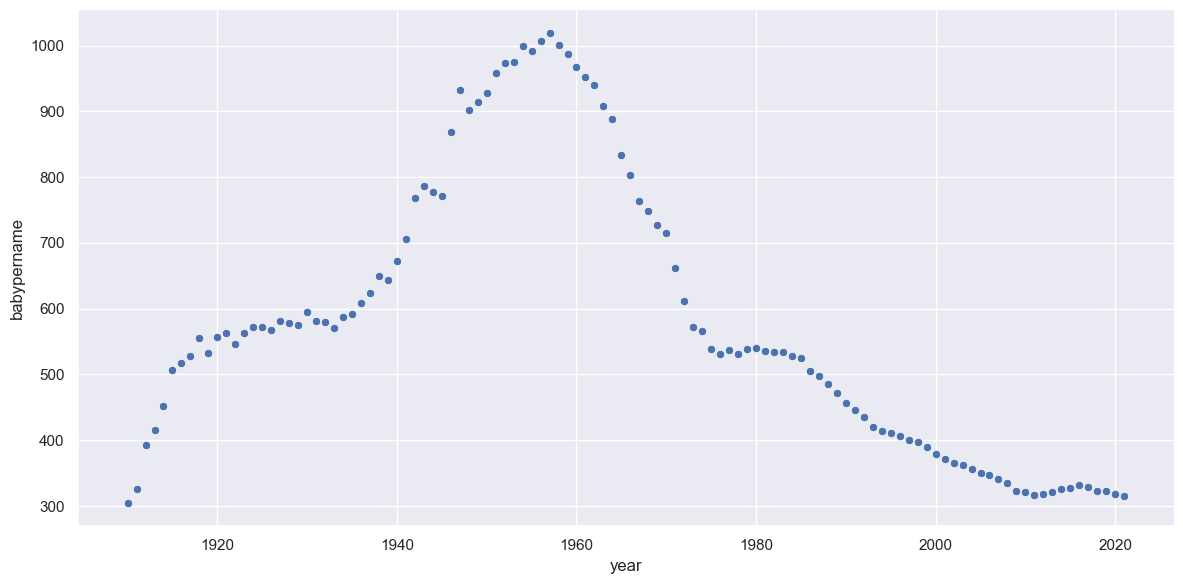

In [9]:
sns.set_theme(style="darkgrid",
              palette="deep",
              font_scale=1.0
             )

sns.relplot(data=df1,
            x="year",
            y="babypername",
            height=6,aspect=2
);

I like this graph because you can see how name diversity trends have changed over time. Before the war, parents were naming their children from an average pool of names. After the war in the babyboomer era, people were having many more children but still picking from a simple name pool, hence the high values of babies per name. In more recent days, parents are getting much more creative with the names of babies as the number of babies per name is as low as it was in the 1910's.

### Number of babies per name on average by sex

This is the same as above excpet now you can group the dataframe by sex and see the two separate graphs. I got an error that I could not figure out the solution to but I kept the dataframe in. The dataframe is shortened bvyt you can see how the average number of girls per name is higher than the number of boys per name.

In [10]:
df2 = df.groupby(['year','sex']).sum()['count']/df.groupby(['year','sex']).nunique()['name']

In [11]:
df2['babypernamepersex'] = (df.groupby(['year','sex']).sum()['count'])/(df.groupby(['year','sex']).nunique()['name'])

In [12]:
df2

year               sex
1910               F                                             325.105263
                   M                                             237.316474
1911               F                                             349.326454
                   M                                              256.55305
1912               F                                             399.919905
                                                ...                        
2020               F                                             251.804831
                   M                                             355.502404
2021               F                                             248.044908
                   M                                             354.495369
babypernamepersex         year  sex
1910  F      325.105263
      M     ...
Length: 225, dtype: object

In [13]:
#sns.relplot(data=df2,
#           x="year",
#            y="babypernamepersex",
#           height=6,aspect=2,col='sex'
#);

### Number of babies per name on average by state

Here I decided to find out what effect the state has on the number of babies per name. I chose to use New York and Wyoming because NY is my home state and Wyoming is the state with the current lowest population.

In [14]:
df_NY = df[df['state']=='NY']
df_WY = df[df['state']=='WY']

In [15]:
df2 = (df_NY.groupby(['year']).sum())/(df_NY.groupby(['year']).nunique())
df3 = (df_WY.groupby(['year']).sum())/(df_WY.groupby(['year']).nunique())

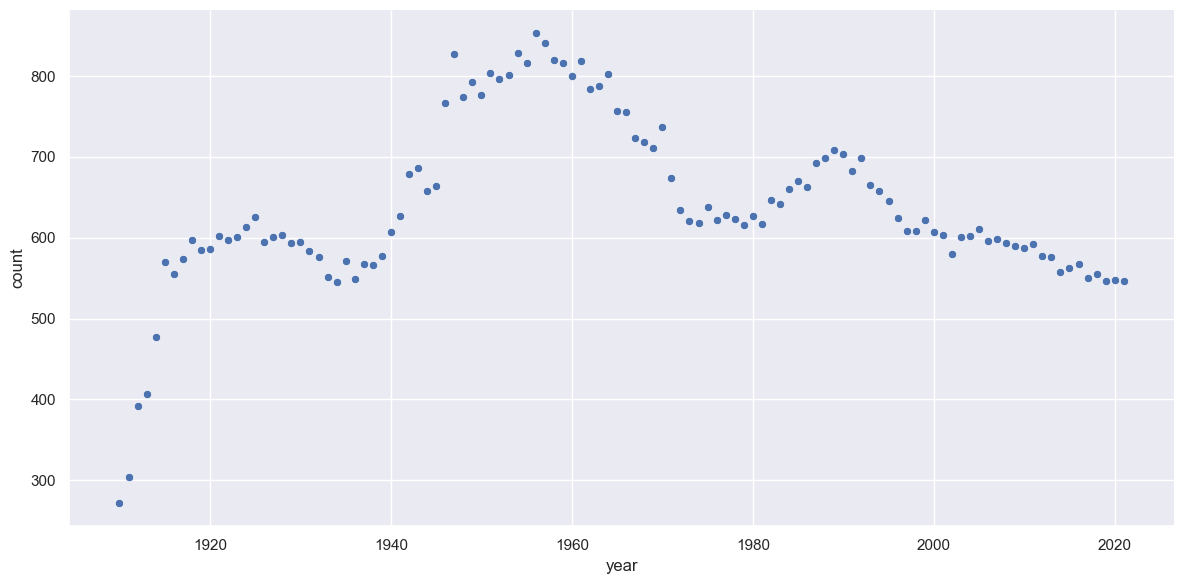

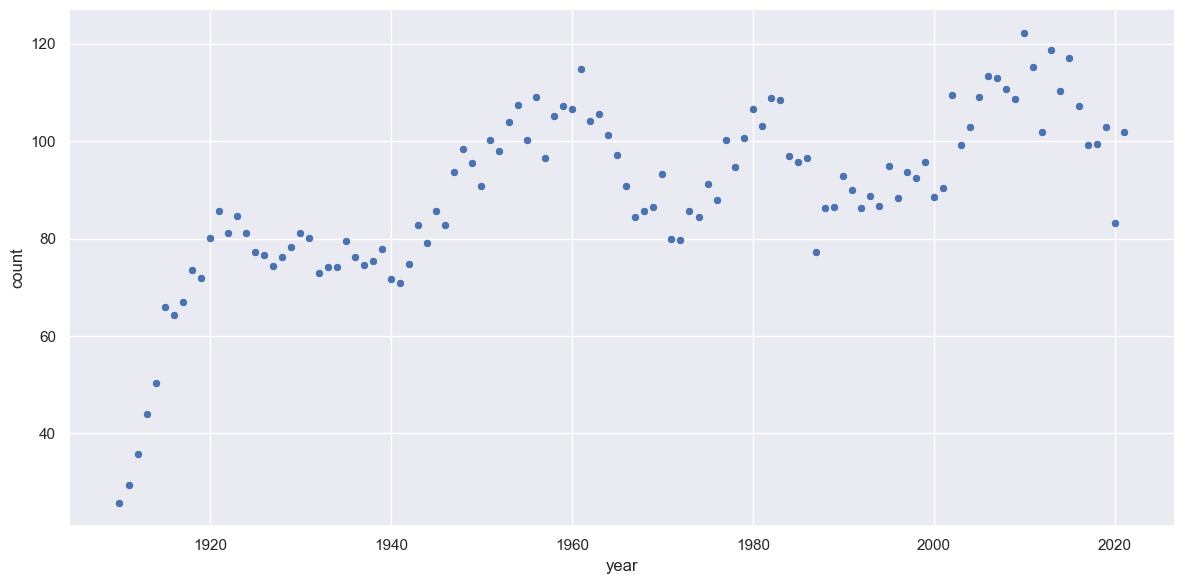

In [16]:
sns.relplot(data=df2,x="year",y="count",height=6,aspect=2);
sns.relplot(data=df3,x="year",y="count",height=6,aspect=2);

I could not figure out how to title the graphs with seaborn but the figure on top is the data for New York and the figure on the bottom is the data for Wyoming. As you can see, it is pretty different per state. New York seems to follow a curve like the US does as a whole but Wyoming just seems to just fluxuate name diversity as the generations go with small dips after each one.

### Popular names

Now to be a little more creative, I can look at induvidual names to see more specific stats and correlations. First, I wanted to see what the most popular name was in each state per year. To accomplish this, I needed to make a helper function called get_max() that can be applied to the dataframe to get more specific sorting results. 

In [37]:
def get_max(df):
    df = df.sort_values(by="count", ascending=False)
    return df.head(1)

In [38]:
popular_names_national = df_national.groupby(by=['year','sex']).apply(get_max)

In [39]:
popular_names_national

year    name sex  count
year sex                               
1880 F   0      1880    Mary   F   7065
     M   942    1880    John   M   9655
1882 F   0      1882    Mary   F   8148
     M   1028   1882    John   M   9557
1883 F   0      1883    Mary   F   8012
...              ...     ...  ..    ...
2019 M   17972  2019    Liam   M  20578
2020 F   0      2020  Olivia   F  17641
     M   17447  2020    Liam   M  19777
2021 F   0      2021  Olivia   F  17728
     M   17544  2021    Liam   M  20272

[282 rows x 4 columns]

Above is the dataframe of the most popular name per year, per state. As you can see, in 1910 the most common name for women was Mary and in 2021 it was Olivia. Now that the oldest and newest common girl names are known, they can be graphed and compared to one another to see when one name became more popular than the other.

In [20]:
df_Olivia = df[(df['name']=='Olivia') & (df['sex']=='F')]
df_Olivia = df_Olivia.groupby(by=['year']).sum()
df_Mary = df[(df['name']=='Mary') & (df['sex']=='F')]
df_Mary = df_Mary.groupby(by=['year']).sum()

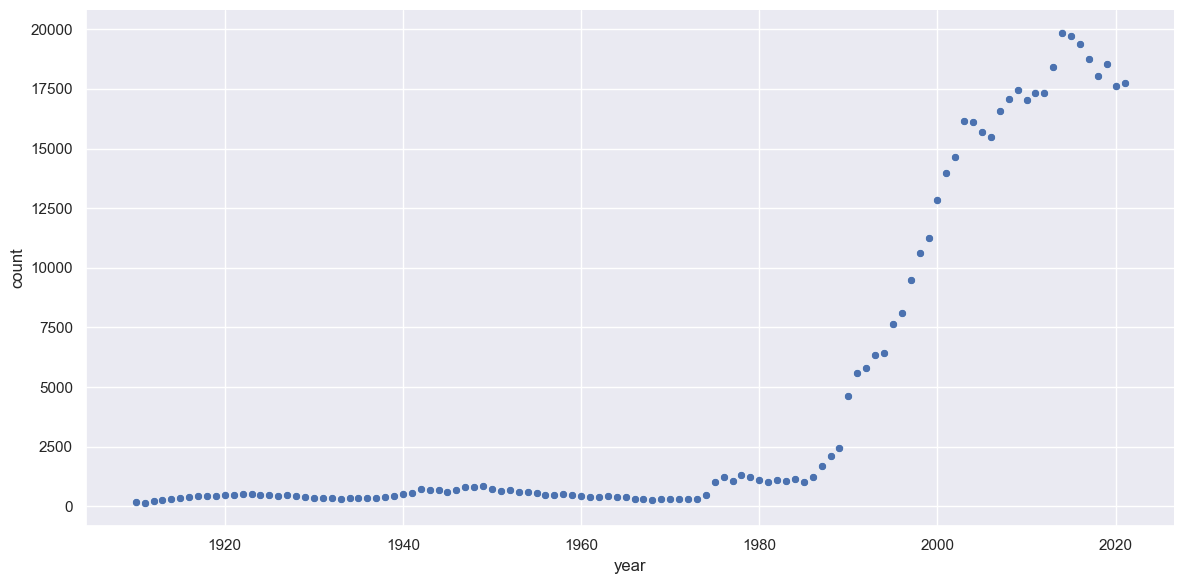

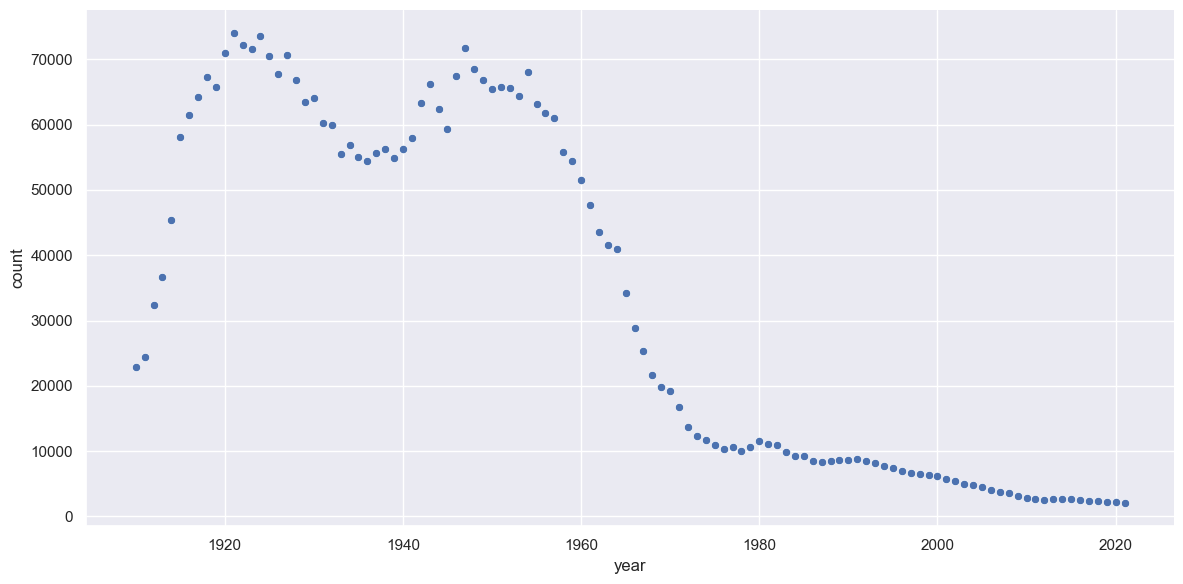

In [21]:
sns.relplot(data=df_Olivia,x="year",y="count",height=6,aspect=2);
sns.relplot(data=df_Mary,x="year",y="count",height=6,aspect=2);

Above is the graoh of Olivia on top and the graph of Mary on the bottom. You can easily see that in the 1980's there was a hard shift to the popularity of names. 1980 is the point where Mary really started to fall off and where Olivia started to take off in popularity.

### Getting creative with specific names

When playing with induvidual names, I had a couple ideas in mind of names I wanted to see the trends of over time in the United States. First I wanted to the see populatiry of my own name which is Samuel, as seen at the top of the project. It may be controversial, but because the database goes abck to 1910, I was curious what effect WWII had on the popularity of the name Adolf in the US. Finally, I wanted to see how the release of the Harry Potter effected the trends of names of characters in the book. Specifically, I wanted to see how Hermione and Harry grew or lost popularity.

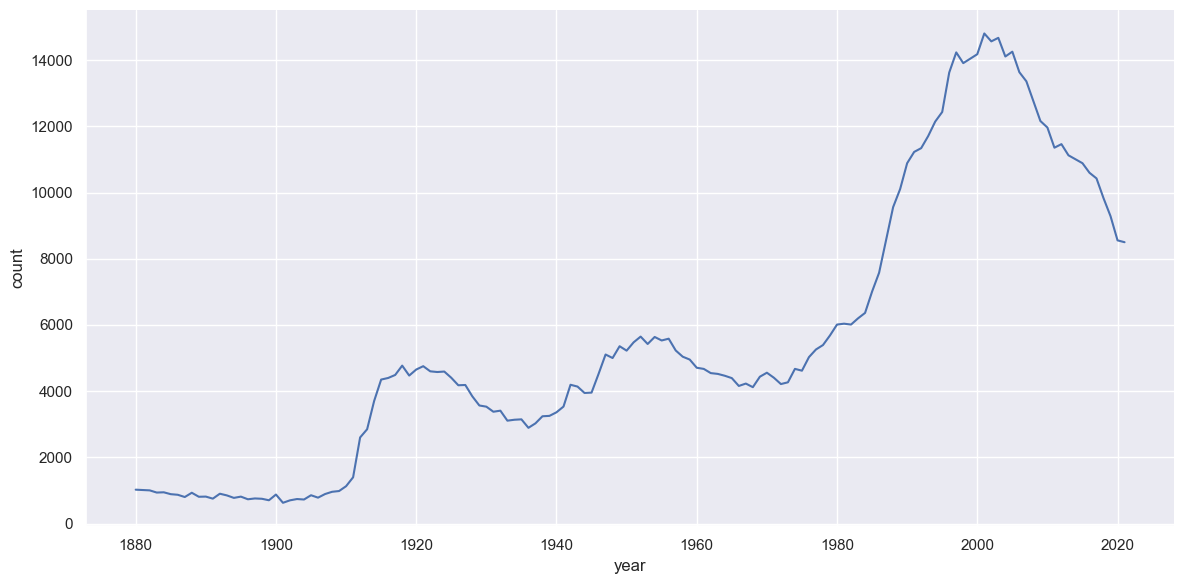

In [46]:
df_Samuel = df_national[(df_national['name']=='Samuel') & (df_national['sex']=='M')]
df_Samuel = df_Samuel.groupby(by=['year']).sum()
sns.relplot(data=df_Samuel,
            x="year",
            y="count",
            kind = "line",
            height=6,aspect=2
);

This graph is the popularity of the name Samuel over time. I was born in 2001 which means I was born in the most popular Samuel year of all time.

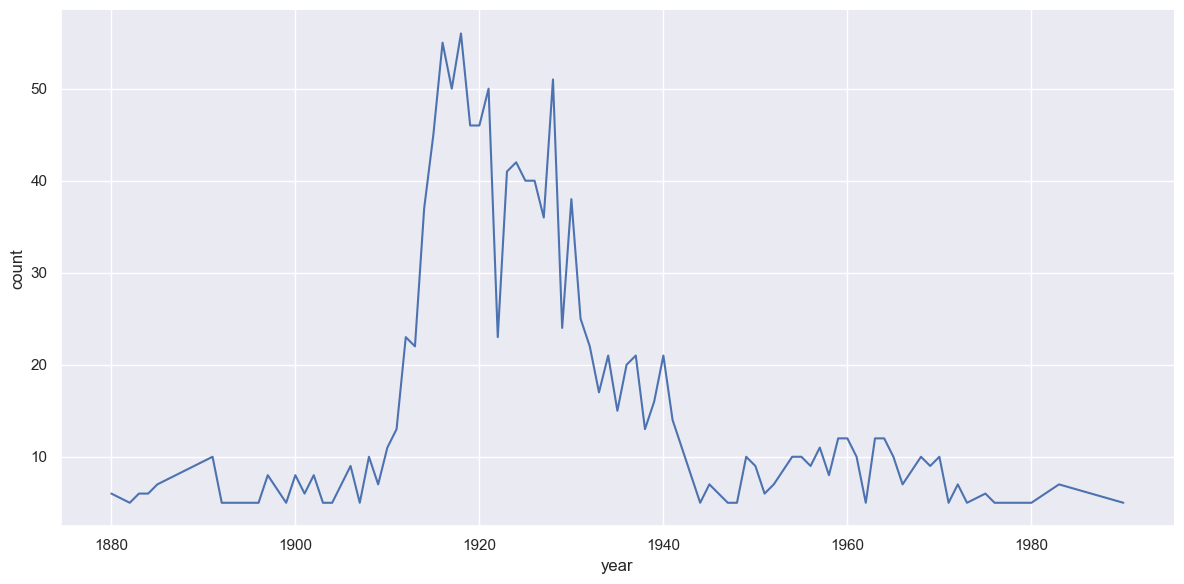

In [47]:
df_Adolf = df_national[(df_national['name']=='Adolf') & (df_national['sex']=='M')]
df_Adolf = df_Adolf.groupby(by=['year']).sum()
sns.relplot(data=df_Adolf,
            x="year",
            y="count",
            kind = "line",
            height=6,aspect=2
);

Above is the popularity graph of the name Adolf in the US. The name was popular in the 20s back when he first took control of power in Germany but after 1940, there were around less than 10 per year. The name completely fell off in the 1990s. This is obviously because the first name Adolf was acociated with one of the worst people of all time. It is interesting too see how history affected name popularity. There is no point of viewing the graphs on top on one another because the name adalf is significantly less popular than Samuel.

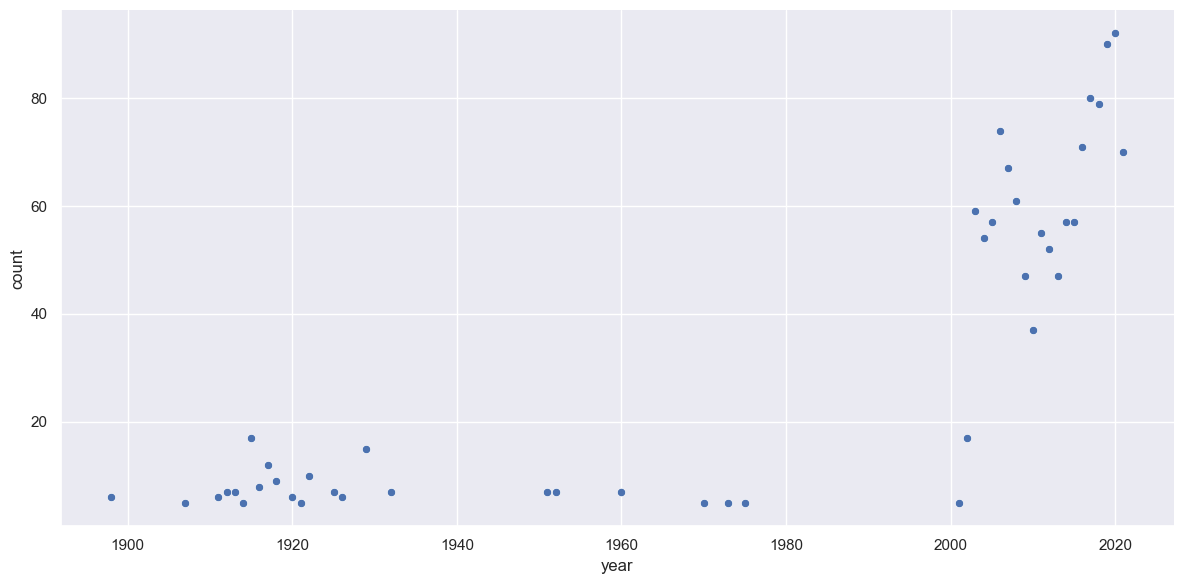

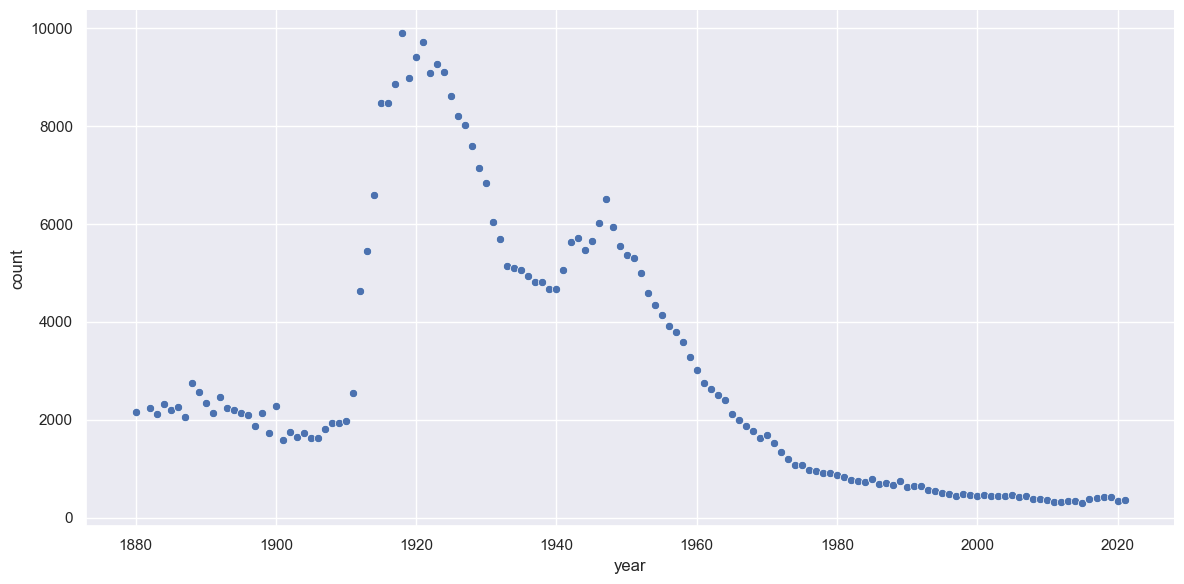

In [52]:
df_Hermione = df_national[(df_national['name']=='Hermione') & (df_national['sex']=='F')]
df_Harry = df_national[(df_national['name']=='Harry') & (df_national['sex']=='M')]
df_Hermione = df_Hermione.groupby(by=['year']).sum()
df_Harry = df_Harry.groupby(by=['year']).sum()
sns.relplot(data=df_Hermione,
            x="year",
            y="count",
            height=6,
            aspect=2
);
sns.relplot(data=df_Harry,
            x="year",
            y="count",
            height=6,
            aspect=2
);
#combined_df = pd.concat([df_Hermione, df_Harry])
#sns.relplot(data=combined_df,
#            x="year",
#            y="count",
#            height=6,
#            aspect=2
#);


Finally, as the last graphs, I am showing the graph of the popularity of the name Hermione (top) and Harry (Bottom). From the first graph you can deduce that the names popularity significantly grew after 2001. This is because people liked the name after reading Harry Potter. On the other hand, the name harry was not effected at all which surprised me. I expected there to be a massive increase in the name after 1997 but there seems to be no change at all after that time. Maybe it's because the name Harry just is'nt as cool at Hermione. 

## Conclusion

It’s fascinating to observe how, over time, the diversity of names has expanded as people increasingly branch out from traditional choices to more unique and personalized names for their children. This trend highlights a shift toward individuality and creativity in naming practices. Additionally, history and pop culture play a significant role in influencing naming trends, with notable figures, events, and fictional characters often inspiring spikes in a name’s popularity. These cultural touchstones provide a snapshot of the era’s values and interests. By examining naming data, it’s easy to identify when specific names peaked in popularity, offering a window into the social and cultural forces shaping those moments. This dynamic evolution of naming conventions reflects broader changes in societal norms and personal expression.